# Run regrid operation on CORDEX

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki

**parameters of regrid operation**

In [2]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## workflow: subset + regrid


In [3]:
from rooki import operators as ops

In [4]:
tas = ops.Input(
    'tas', ['c3s-cordex.output.EUR-11.MOHC.MOHC-HadGEM2-ES.rcp85.r1i1p1.MOHC-HadREM3-GA7-05.v1.mon.tas.v20200330']
)

wf = ops.Subset(tas, time="2030/2030")

wf = ops.Regrid(wf, method="nearest_s2d", grid="1deg")

In [5]:
resp = wf.orchestrate()
resp.ok 

True

In [6]:
resp.status

'ProcessSucceeded'

In [7]:
ds = resp.datasets()[0]
ds

<xarray.Dataset> Size: 3MB
Dimensions:    (lat: 180, lon: 360, bnds: 2, time: 12)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    height     float64 8B ...
  * time       (time) object 96B 2030-01-16 00:00:00 ... 2030-12-16 00:00:00
    time_bnds  (time, bnds) object 192B ...
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 3MB ...
Attributes: (12/27)
    model_id:                       MOHC-HadREM3-GA7-05
    driving_experiment_name:        rcp85
    creation_date:                  2020-02-05T17:15:43Z
    project_id:                     CORDEX
    experiment:                     rcp85 run using HadGEM2-ES as a driving m...
    institution:                    MetOffice, Hadley Centre, UK
    ...                             ...
    tracking_id:                    hdl:21.14103/994e527c-53df-4fb8-9768-ecc1...
    grid:                           Global 1.0 degree grid with one cell cent...
    grid_label:                     gr
    regrid_operation:               nearest_s2d_412x424_180x360
    regrid_tool:                    xESMF_v0.8.6
    regrid_weights_uid:             95a894d5f89b99b6c8f9ba8baf7e1c5e_d24f4f68...

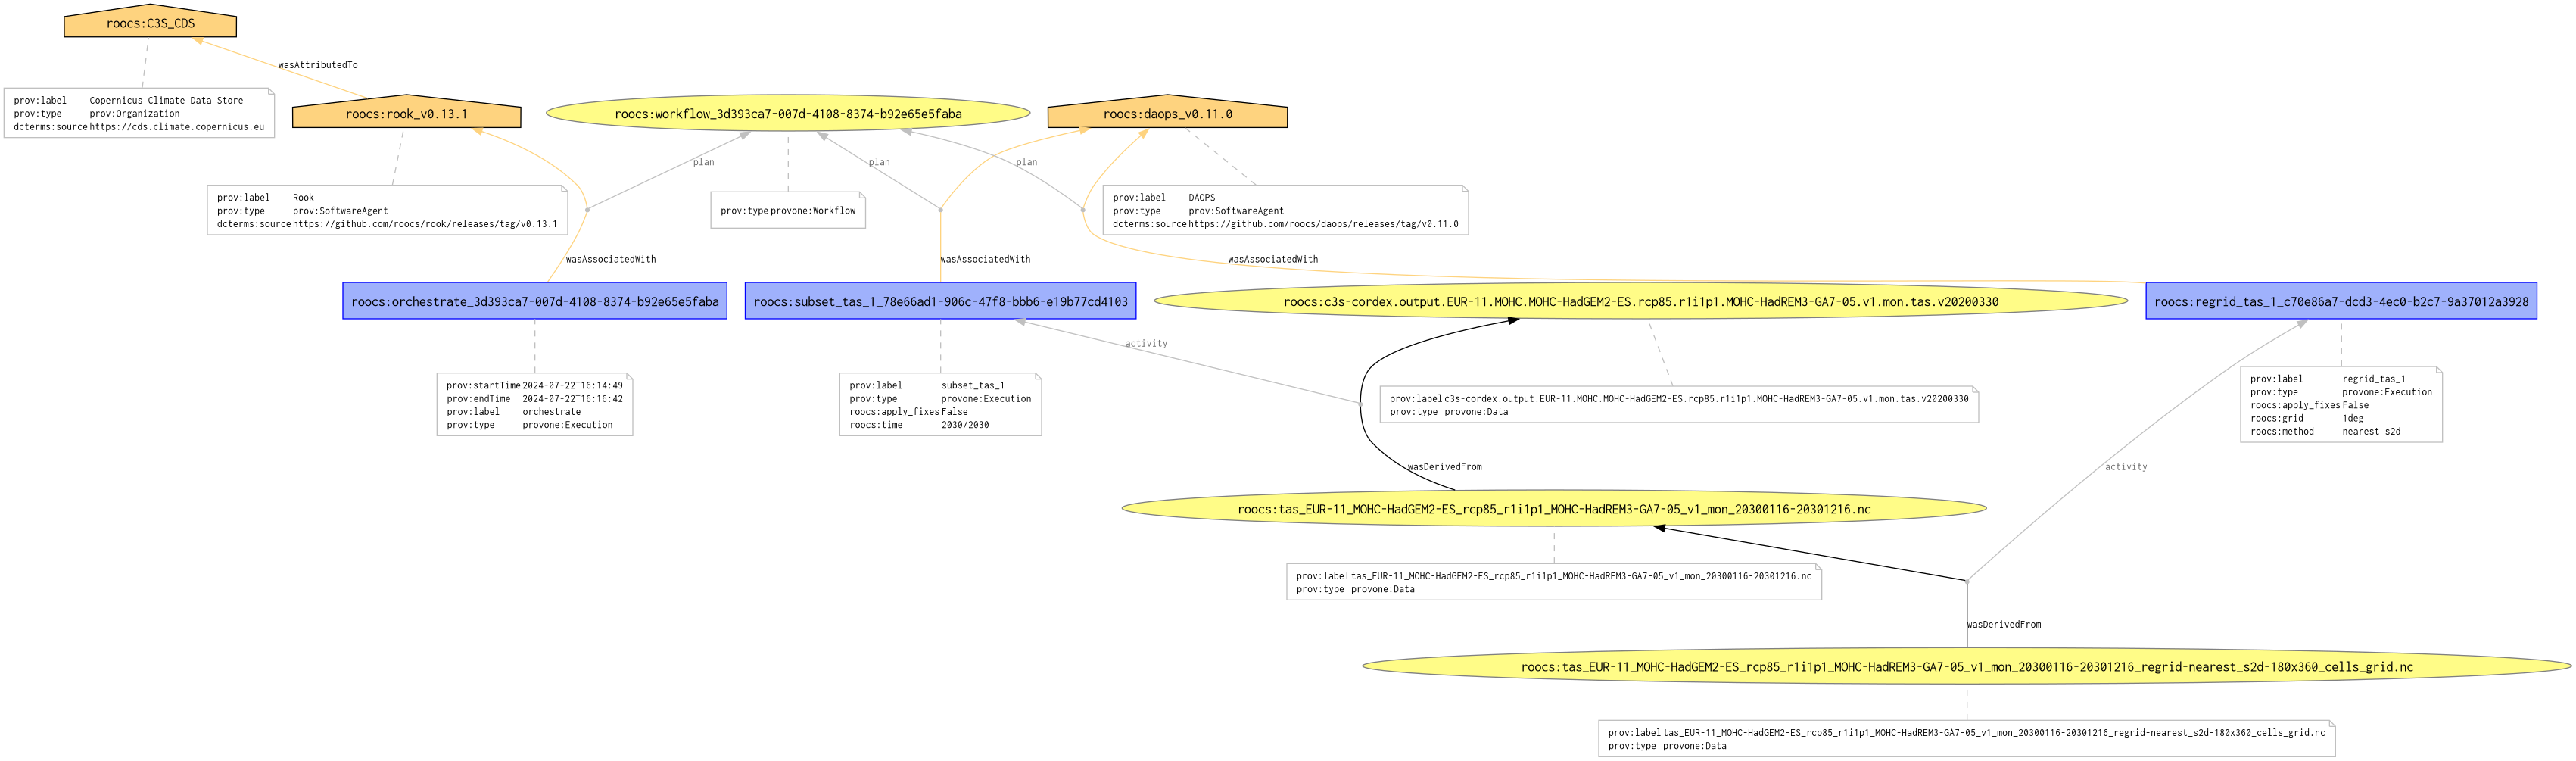

In [8]:
from IPython.display import Image
Image(resp.provenance_image())